In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
df=pd.read_excel('G:\DB.xlsx')

In [143]:
df.head()

,Status,User,Created,Start,Worker_ID,Price,Order Detail
0,PENDING,Ashghal Ahmad,2020-11-07 13:59:14,2020-12-31 19:30:00,977,3000,1
1,PENDING,Ahsan Ali,2020-11-24 15:48:44,2020-12-31 19:00:00,555432,4000,1
2,PENDING,Safia,2020-11-07 14:47:28,2020-12-31 15:30:00,397229,3000,1
3,PENDING,Irum Adnan,2020-11-17 16:54:28,2020-12-31 12:30:00,8651,2500,1
4,PENDING,Ahmad Khan,2020-11-12 18:54:49,2020-12-31 12:00:00,208535,2000,1


#### You will create a visual which shows segregation of total orders by their status. You can use any library you want. 

In [19]:
Status_Seg=df.groupby('Status')['Order Detail'].sum().index
Status_Count=df.groupby('Status')['Order Detail'].sum().values

<BarContainer object of 7 artists>

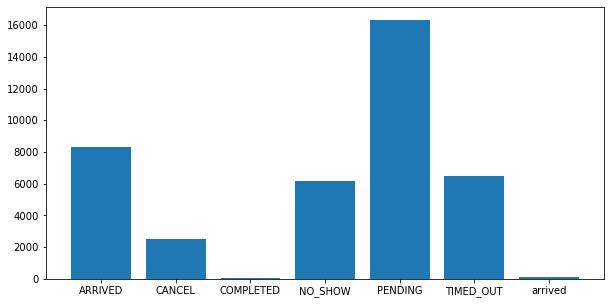

In [24]:
plt.figure(figsize=(10,5))
plt.bar(Status_Seg,Status_Count)

#### Q3: You need to identify the Workers who didn’t get orders and export their ID’s in excel file. Do not do it manually. 

In [36]:
orders=pd.read_excel('G:\DB.xlsx',sheet_name='Order')
workers=pd.read_excel('G:\DB.xlsx',sheet_name='Worker')

In [41]:
orders.head()

,Status,User,Created,Start,Worker_ID,Price,Order Detail
0,PENDING,Ashghal Ahmad,2020-11-07 13:59:14,2020-12-31 19:30:00,977,3000,1
1,PENDING,Ahsan Ali,2020-11-24 15:48:44,2020-12-31 19:00:00,555432,4000,1
2,PENDING,Safia,2020-11-07 14:47:28,2020-12-31 15:30:00,397229,3000,1
3,PENDING,Irum Adnan,2020-11-17 16:54:28,2020-12-31 12:30:00,8651,2500,1
4,PENDING,Ahmad Khan,2020-11-12 18:54:49,2020-12-31 12:00:00,208535,2000,1


In [42]:
workers.head()

,ID
0,121
1,123
2,132
3,139
4,166


In [43]:
fully_df=orders.join(workers,how='outer')

In [44]:
fully_df.head()

,Status,User,Created,Start,Worker_ID,Price,Order Detail,ID
0,PENDING,Ashghal Ahmad,2020-11-07 13:59:14,2020-12-31 19:30:00,977,3000,1,121.0
1,PENDING,Ahsan Ali,2020-11-24 15:48:44,2020-12-31 19:00:00,555432,4000,1,123.0
2,PENDING,Safia,2020-11-07 14:47:28,2020-12-31 15:30:00,397229,3000,1,132.0
3,PENDING,Irum Adnan,2020-11-17 16:54:28,2020-12-31 12:30:00,8651,2500,1,139.0
4,PENDING,Ahmad Khan,2020-11-12 18:54:49,2020-12-31 12:00:00,208535,2000,1,166.0


### Register Workder who did't get Orders

In [115]:
fully_df['RW_NOT_GETORDER']=pd.Series(fully_df[fully_df['Status']=='NO_SHOW'].ID.dropna().values)

In [120]:
fully_df['RW_NOT_GETORDER'].dropna()

0        1822.0
1        1894.0
2        2075.0
3        2119.0
4        2383.0
         ...   
501    624760.0
502    625838.0
503    628249.0
504    631627.0
505    639216.0
Name: RW_NOT_GETORDER, Length: 506, dtype: float64

### Non-Register Workder who did't get Orders

In [74]:
fully_df.head()

,Status,User,Created,Start,Worker_ID,Price,Order Detail,ID,Register Workers,RW_NOT_GETORDER
0,PENDING,Ashghal Ahmad,2020-11-07 13:59:14,2020-12-31 19:30:00,977,3000,1,121.0,NaN,1822.0
1,PENDING,Ahsan Ali,2020-11-24 15:48:44,2020-12-31 19:00:00,555432,4000,1,123.0,NaN,1894.0
2,PENDING,Safia,2020-11-07 14:47:28,2020-12-31 15:30:00,397229,3000,1,132.0,NaN,2075.0
3,PENDING,Irum Adnan,2020-11-17 16:54:28,2020-12-31 12:30:00,8651,2500,1,139.0,NaN,2119.0
4,PENDING,Ahmad Khan,2020-11-12 18:54:49,2020-12-31 12:00:00,208535,2000,1,166.0,NaN,2383.0


In [105]:
fully_df['NRW_NOT_GETORDER']=fully_df[fully_df['Status']=='NO_SHOW'].Worker_ID.dropna()

In [106]:
fully_df['NRW_NOT_GETORDER']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
39993         NaN
39994         NaN
39995    551191.0
39996         NaN
39997         NaN
Name: NRW_NOT_GETORDER, Length: 39998, dtype: float64

In [91]:
fully_df.head()

,Status,User,Created,Start,Worker_ID,Price,Order Detail,ID,Register Workers,RW_NOT_GETORDER,NRW_NOT_GETORDER
0,PENDING,Ashghal Ahmad,2020-11-07 13:59:14,2020-12-31 19:30:00,977,3000,1,121.0,NaN,1822.0,NaN
1,PENDING,Ahsan Ali,2020-11-24 15:48:44,2020-12-31 19:00:00,555432,4000,1,123.0,NaN,1894.0,NaN
2,PENDING,Safia,2020-11-07 14:47:28,2020-12-31 15:30:00,397229,3000,1,132.0,NaN,2075.0,NaN
3,PENDING,Irum Adnan,2020-11-17 16:54:28,2020-12-31 12:30:00,8651,2500,1,139.0,NaN,2119.0,NaN
4,PENDING,Ahmad Khan,2020-11-12 18:54:49,2020-12-31 12:00:00,208535,2000,1,166.0,NaN,2383.0,NaN


In [98]:
WORKERS_NO_ORDERS=pd.DataFrame(data=fully_df['NRW_NOT_GETORDER']).dropna()

In [129]:
WORKERS_NO_ORDERS=pd.concat([WORKERS_NO_ORDERS,fully_df['RW_NOT_GETORDER'].dropna()],axis=1)

In [132]:
WORKERS_NO_ORDERS.to_excel('G:\WORKERS_NO_ORDER.xlsx',index=False)

### You will create a single visual which shows a bar chart of “Total Orders” placed on each date and their line chart of “Last 7 Days Rolling Average”. Visuals should dynamically show the last 14 days of the data means if I dump more data into the table it dynamically picks the last 14 days. P.S. Line should not start with the ascent because the last 14th day has previous data to calculate its last 7 day rolling average.  

In [144]:
df.head()

,Status,User,Created,Start,Worker_ID,Price,Order Detail
0,PENDING,Ashghal Ahmad,2020-11-07 13:59:14,2020-12-31 19:30:00,977,3000,1
1,PENDING,Ahsan Ali,2020-11-24 15:48:44,2020-12-31 19:00:00,555432,4000,1
2,PENDING,Safia,2020-11-07 14:47:28,2020-12-31 15:30:00,397229,3000,1
3,PENDING,Irum Adnan,2020-11-17 16:54:28,2020-12-31 12:30:00,8651,2500,1
4,PENDING,Ahmad Khan,2020-11-12 18:54:49,2020-12-31 12:00:00,208535,2000,1


Enter Last Days Values: 19


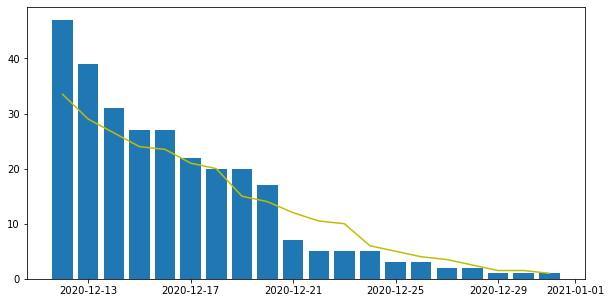

In [418]:
plt.figure(figsize=(10,5))

ld_values=int(input('Enter Last Days Values: '))

#Total Ordered Last Days
date_rel=df.groupby(pd.to_datetime(df['Start'].dt.date[df['Start'].dt.month>df['Start'].dt.month.max()-1]).dt.date[df['Start'].dt.day>=df['Start'].dt.day.max()-ld_values]).Status.count().sort_values().index
values=date=df.groupby(pd.to_datetime(df['Start'].dt.date[df['Start'].dt.month>df['Start'].dt.month.max()-1]).dt.date[df['Start'].dt.day>=df['Start'].dt.day.max()-ld_values]).Status.count().sort_values().values
plt.bar(sorted(date_rel,reverse=True),values)

#Average Ordered Last Days
ds=df.groupby(pd.to_datetime(df['Start'].dt.date[df['Start'].dt.month>df['Start'].dt.month.max()-1]).dt.date[df['Start'].dt.day>=df['Start'].dt.day.max()-ld_values]).Status.count().values
avg=[val for val in (ds[0:ds.size-1]+ds[1:])/2]
avg.insert(0,1)
plt.plot(pd.to_datetime(df['Start'].dt.date[df['Start'].dt.month>df['Start'].dt.month.max()-1]).dt.date[df['Start'].dt.day>=df['Start'].dt.day.max()-ld_values].unique(),sorted(avg),color='y')